# California Housing price Prediction

In [1]:
#########################################################################
#########################################################################
####Below are libraries used for the project#############################
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from math import sqrt
%matplotlib inline
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
#########################################################################
#########################################################################

## Data Cleaning And EDA

In [2]:
# Reading the dataset
df_house=pd.read_excel("1553768847_housing.xlsx")

In [3]:
# Printing the Head to understand the dataset
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


### EDA

In [4]:
#Printing the list of columns
df_house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [5]:
#Understanding basic info of the dataset
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


### Data Cleaning

In [6]:
#Identifying count of missing values in each columns
df_house.isnull().sum(axis='rows')

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [7]:
#Identifying count of missing values in each rows
df_house.isnull().sum(axis='columns').value_counts()

0    20433
1      207
dtype: int64

In [8]:
## Since we see that total_bedrooms is the only column with missing values
##we will impute the data with mean bedrooms in the dataset
df_house['total_bedrooms']=df_house['total_bedrooms'].fillna(df_house['total_bedrooms'].mean())
#Checking for value update and current NA count
df_house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

## Encoding and Standardizing the data

In [9]:
df_house['ocean_proximity'].unique() #Before encoding

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
# Encoding categorical column
df_house['ocean_proximity']=LabelEncoder().fit_transform(df_house['ocean_proximity'])
df_house['ocean_proximity'].unique()   #After encoding

array([3, 0, 1, 4, 2])

In [11]:
# Standardize the data point :
# Get column names first
names = df_house.columns
# Create the Scaler object
scaler = StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df_house)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,1.291089,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.291089,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.291089,1.258693


<Figure size 432x288 with 0 Axes>

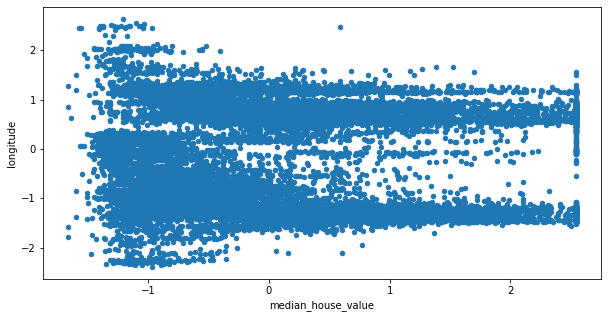

<Figure size 432x288 with 0 Axes>

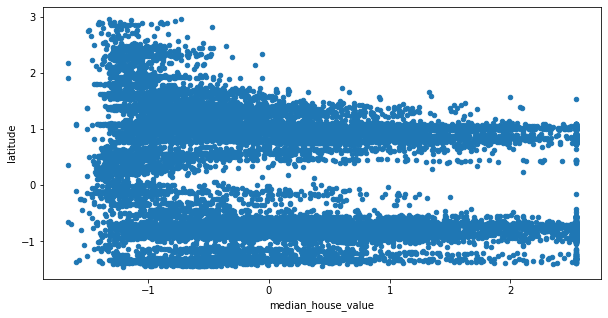

<Figure size 432x288 with 0 Axes>

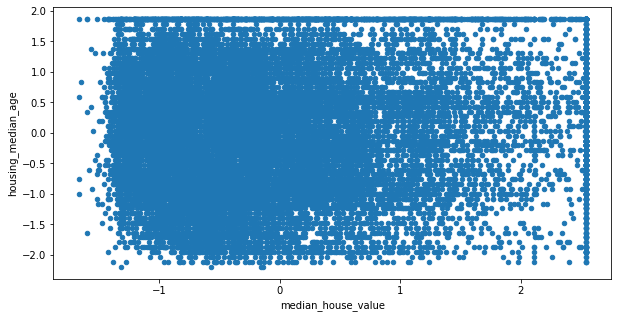

<Figure size 432x288 with 0 Axes>

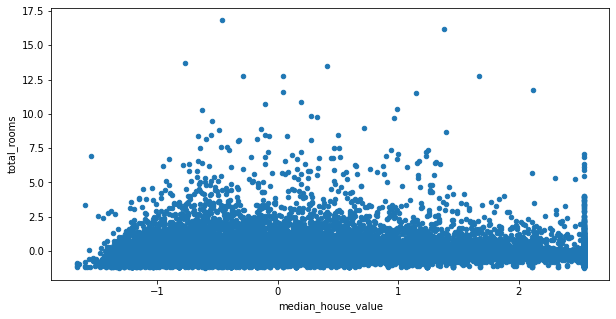

<Figure size 432x288 with 0 Axes>

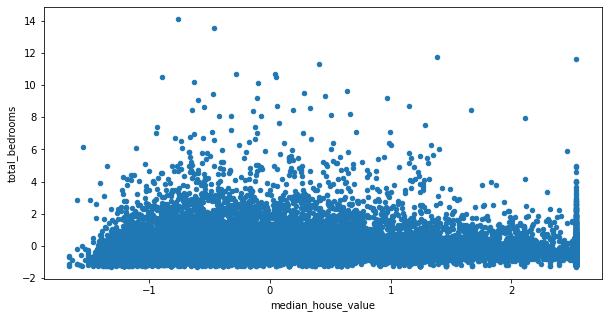

<Figure size 432x288 with 0 Axes>

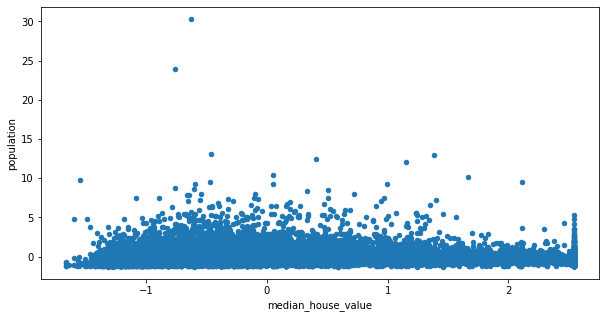

<Figure size 432x288 with 0 Axes>

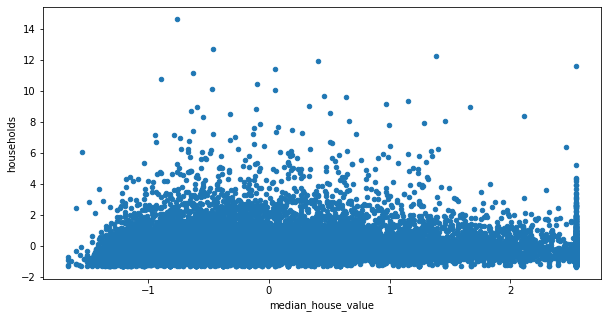

<Figure size 432x288 with 0 Axes>

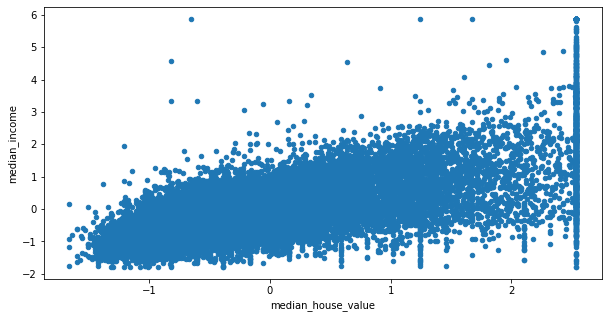

<Figure size 432x288 with 0 Axes>

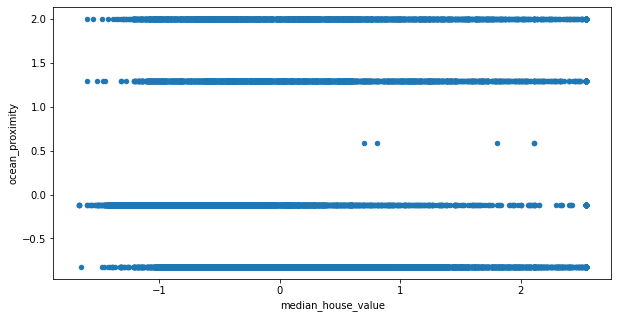

<Figure size 432x288 with 0 Axes>

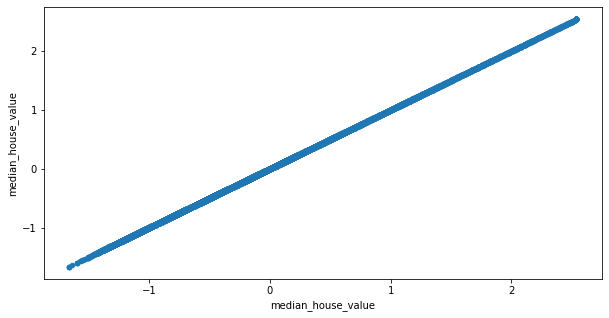

In [12]:
##Check for Linearity
for column in df_house:
    plt.figure()
    scaled_df.plot(kind='scatter',x='median_house_value',y=column,figsize=(10,5))

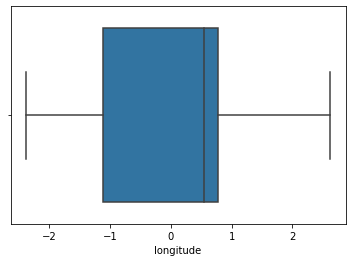

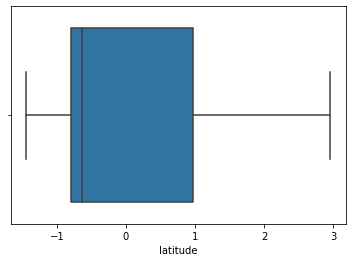

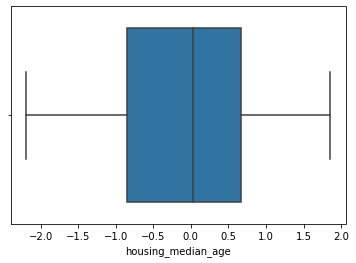

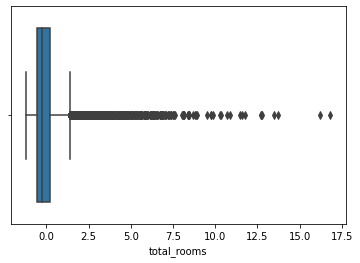

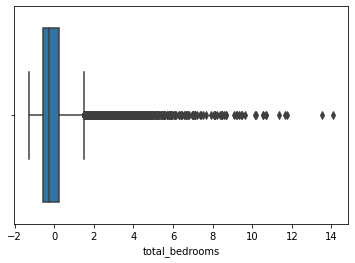

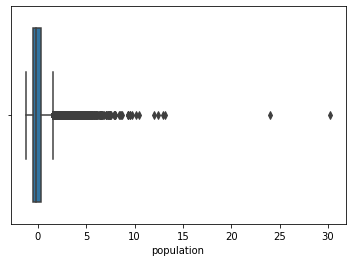

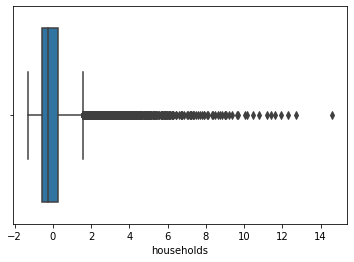

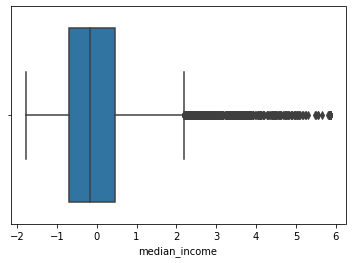

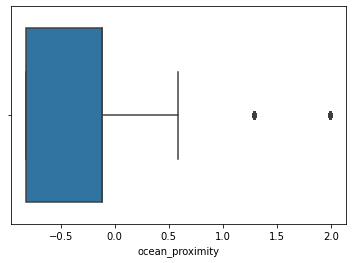

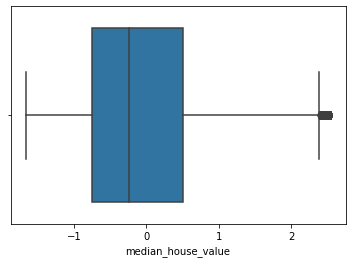

In [13]:
# Creating box plots for scaled columns
for column in scaled_df:
    plt.figure()
    sns.boxplot(x=scaled_df[column])

## Creating input (X) and output (Y) data from the dataset

In [14]:
X_Features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']
X=scaled_df[X_Features]
Y=scaled_df['median_house_value']
print(df_house.shape)
print(X.shape)
print(Y.shape)

(20640, 10)
(20640, 9)
(20640,)


## Split the dataset into training and testing datasets

In [15]:
## The data is split into training dataset and test dataset in 80:20 ratio.
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(16512, 9) (16512,)
(4128, 9) (4128,)


## Linear Regression

In [16]:
# Performing Linear regression on the training dataset
linreg=LinearRegression()
linreg.fit(x_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [17]:
#Using test dataset to test the values
y_predict = linreg.predict(x_test)
y_predict

array([ 0.29190667, -0.89698222,  0.37661932, ...,  0.63533543,
        0.45210368, -0.4203247 ])

In [18]:
#Calculating root mean squared error (RMSE) from Linear Regression
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.6056598120301221
0.6276223517950296
